In [1]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Merging all the datasets with glob module which is used for pattern matching to find file paths that match a specified pattern.
flat_df = pd.concat([pd.read_csv(file) for file in glob.glob("./data/*.csv")], ignore_index=True)
flat_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [3]:
flat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936652 entries, 0 to 936651
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                936652 non-null  object 
 1   town                 936652 non-null  object 
 2   flat_type            936652 non-null  object 
 3   block                936652 non-null  object 
 4   street_name          936652 non-null  object 
 5   storey_range         936652 non-null  object 
 6   floor_area_sqm       936652 non-null  float64
 7   flat_model           936652 non-null  object 
 8   lease_commence_date  936652 non-null  int64  
 9   resale_price         936652 non-null  float64
 10  remaining_lease      227602 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 78.6+ MB


In [4]:
# Checking for missing values
flat_df.isnull().sum() / len(flat_df)*100

month                   0.000000
town                    0.000000
flat_type               0.000000
block                   0.000000
street_name             0.000000
storey_range            0.000000
floor_area_sqm          0.000000
flat_model              0.000000
lease_commence_date     0.000000
resale_price            0.000000
remaining_lease        75.700474
dtype: float64

In [5]:
# Since remaining_lease has 75% of missing values, we drop that column
flat_df.drop(columns='remaining_lease',inplace=True)
flat_df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [6]:
flat_df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,936652.000000,936652.000000,9.366520e+05
mean,95.687236,1988.375771,3.237942e+05
std,25.809543,10.763106,1.732968e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.950000e+05
50%,93.000000,1986.000000,3.000000e+05
75%,113.000000,1996.000000,4.200000e+05
max,366.700000,2020.000000,1.588000e+06


In [7]:
flat_df.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
dtype: object

In [8]:
flat_df['month']

0         1990-01
1         1990-01
2         1990-01
3         1990-01
4         1990-01
           ...   
936647    2014-12
936648    2014-12
936649    2014-12
936650    2014-12
936651    2014-12
Name: month, Length: 936652, dtype: object

In [9]:
# Seperating year and month from month column 
# When expand=True, the result of the split operation is returned as separate columns

flat_df[['resale_year','resale_month']]=flat_df['month'].str.split("-",expand=True)

In [10]:
# drop the month column after splitting
flat_df.drop('month',axis=1,inplace=True)
flat_df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,01
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,01
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,01
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,01


In [11]:
# Splitting the storey_range column to upper and lower values
flat_df[['storey_lower_limit','storey_upper_limit']]=flat_df['storey_range'].str.split('TO',expand=True)

In [12]:
# drop the storey_range column after splitting
flat_df.drop('storey_range',axis=1,inplace=True)
flat_df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,storey_lower_limit,storey_upper_limit
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,1990,01,10,12
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,1990,01,04,06
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,1990,01,10,12
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,1990,01,07,09
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,1990,01,04,06


In [13]:
flat_df.dtypes

town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
resale_year             object
resale_month            object
storey_lower_limit      object
storey_upper_limit      object
dtype: object

In [14]:
# Converting the splited columns to numerical values
flat_df['resale_year'] = pd.to_numeric(flat_df['resale_year'])
flat_df['resale_month'] = pd.to_numeric(flat_df['resale_month'])
flat_df['storey_lower_limit'] = pd.to_numeric(flat_df['storey_lower_limit'])
flat_df['storey_upper_limit'] = pd.to_numeric(flat_df['storey_upper_limit'])

flat_df.dtypes

town                    object
flat_type               object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
resale_year              int64
resale_month             int64
storey_lower_limit       int64
storey_upper_limit       int64
dtype: object

In [15]:
flat_df['flat_type'].value_counts()

flat_type
4 ROOM              356439
3 ROOM              298282
5 ROOM              197678
EXECUTIVE            70284
2 ROOM               12119
1 ROOM                1306
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [16]:
# MULTI GENERATION category is duplicated in flat_type column, so make it as single category
flat_df['flat_type'] = flat_df['flat_type'].str.replace('MULTI-GENERATION','MULTI GENERATION')

flat_df['flat_type'].value_counts()

flat_type
4 ROOM              356439
3 ROOM              298282
5 ROOM              197678
EXECUTIVE            70284
2 ROOM               12119
1 ROOM                1306
MULTI GENERATION       544
Name: count, dtype: int64

In [17]:
flat_df['flat_model'].value_counts()

flat_model
Model A                   198462
Improved                  170488
New Generation            111189
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47799
Simplified                 34638
Apartment                  25892
Standard                   25394
SIMPLIFIED                 23258
Maisonette                 17696
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10253
APARTMENT                   9901
DBSS                        3406
Adjoined flat               1265
Model A-Maisonette          1109
MODEL A-MAISONETTE           982
Terrace                      449
Type S1                      447
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      222
2-room                       153
Premium Apartment Loft       114
Premium Maisonette            86
Improved-Maisonette           84

In [18]:
# Many categories are duplicated in flat_model column. So make all values capitalize
flat_df['flat_model'] = flat_df['flat_model'].str.capitalize()

flat_df['flat_model'].value_counts()

flat_model
Model a                   268843
Improved                  244077
New generation            190087
Simplified                 57896
Premium apartment          47805
Standard                   42769
Apartment                  35793
Maisonette                 29911
Model a2                   10253
Dbss                        3406
Model a-maisonette          2091
Adjoined flat               1265
Terrace                      696
Multi generation             544
Type s1                      447
Type s2                      222
2-room                       174
Improved-maisonette          128
Premium apartment loft       114
Premium maisonette            86
3gen                          45
Name: count, dtype: int64

In [19]:
flat_df['town'].value_counts()

town
TAMPINES           80618
YISHUN             70686
JURONG WEST        67323
BEDOK              67119
WOODLANDS          66210
ANG MO KIO         52462
HOUGANG            51254
BUKIT BATOK        45013
CHOA CHU KANG      38767
BUKIT MERAH        34714
PASIR RIS          33439
SENGKANG           33228
TOA PAYOH          31827
QUEENSTOWN         29025
GEYLANG            28435
CLEMENTI           28237
BUKIT PANJANG      27976
KALLANG/WHAMPOA    27546
JURONG EAST        24977
SERANGOON          22986
BISHAN             21400
PUNGGOL            21358
SEMBAWANG          14150
MARINE PARADE       8086
CENTRAL AREA        7212
BUKIT TIMAH         2540
LIM CHU KANG          64
Name: count, dtype: int64

In [20]:
flat_df['block'].value_counts()

block
2       4616
1       4072
110     3438
101     3425
4       3367
        ... 
376C       7
226E       2
226F       1
457B       1
458B       1
Name: count, Length: 2714, dtype: int64

In [21]:
# convering block column to numerical values
flat_df['block'] = pd.to_numeric(flat_df['block'], errors='coerce')

In [22]:
flat_df.isnull().sum()

town                        0
flat_type                   0
block                  128337
street_name                 0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
resale_year                 0
resale_month                0
storey_lower_limit          0
storey_upper_limit          0
dtype: int64

In [23]:
# Handling the missing values
flat_df['block'] = flat_df['block'].fillna(flat_df['block'].mode()[0])
flat_df.isnull().sum()

town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
resale_year            0
resale_month           0
storey_lower_limit     0
storey_upper_limit     0
dtype: int64

In [24]:
# Checking for duplicates
flat_df.duplicated().sum()

2644

In [25]:
# droping the duplicate recrods
flat_df.drop_duplicates(inplace=True)

In [26]:
flat_df.dtypes

town                    object
flat_type               object
block                  float64
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
resale_year              int64
resale_month             int64
storey_lower_limit       int64
storey_upper_limit       int64
dtype: object

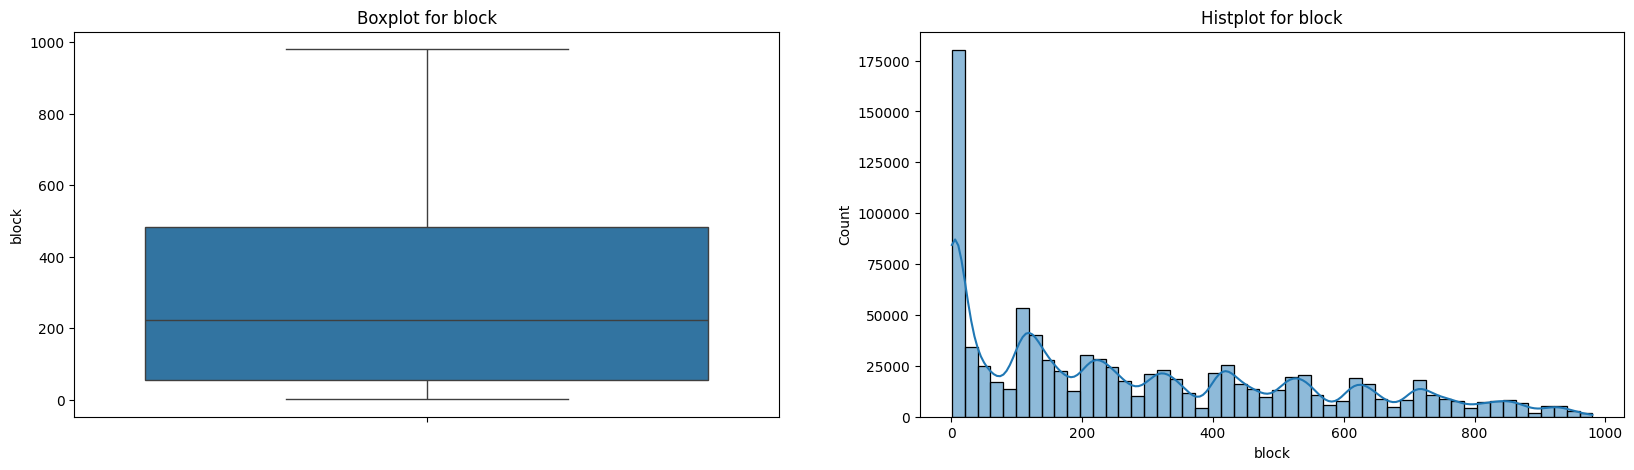

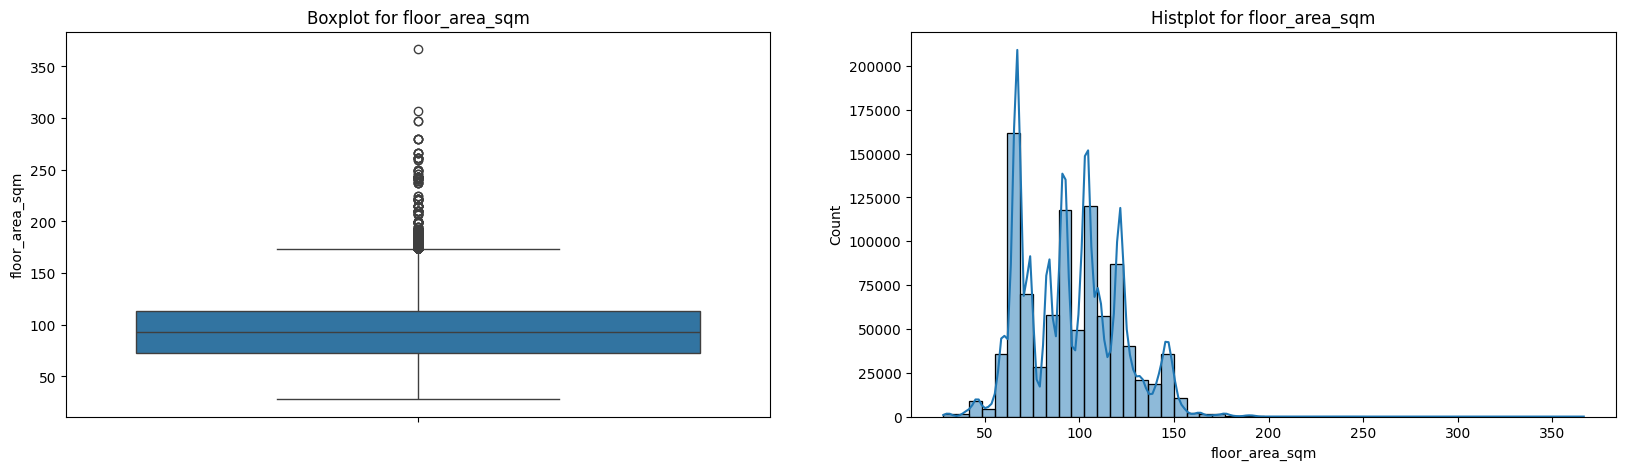

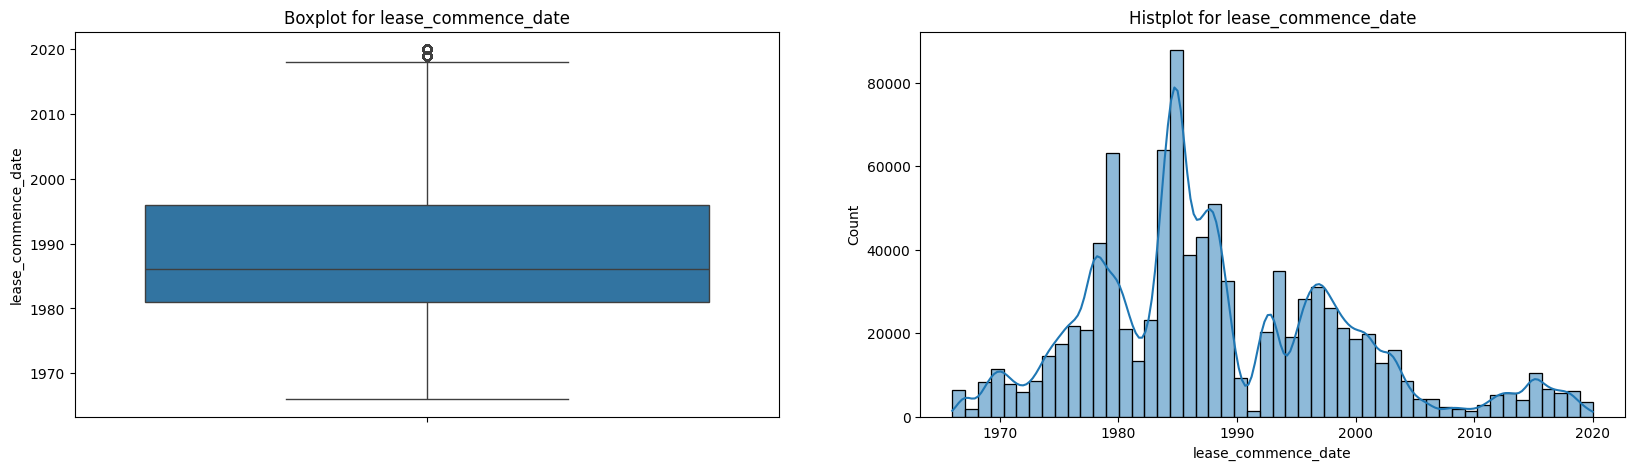

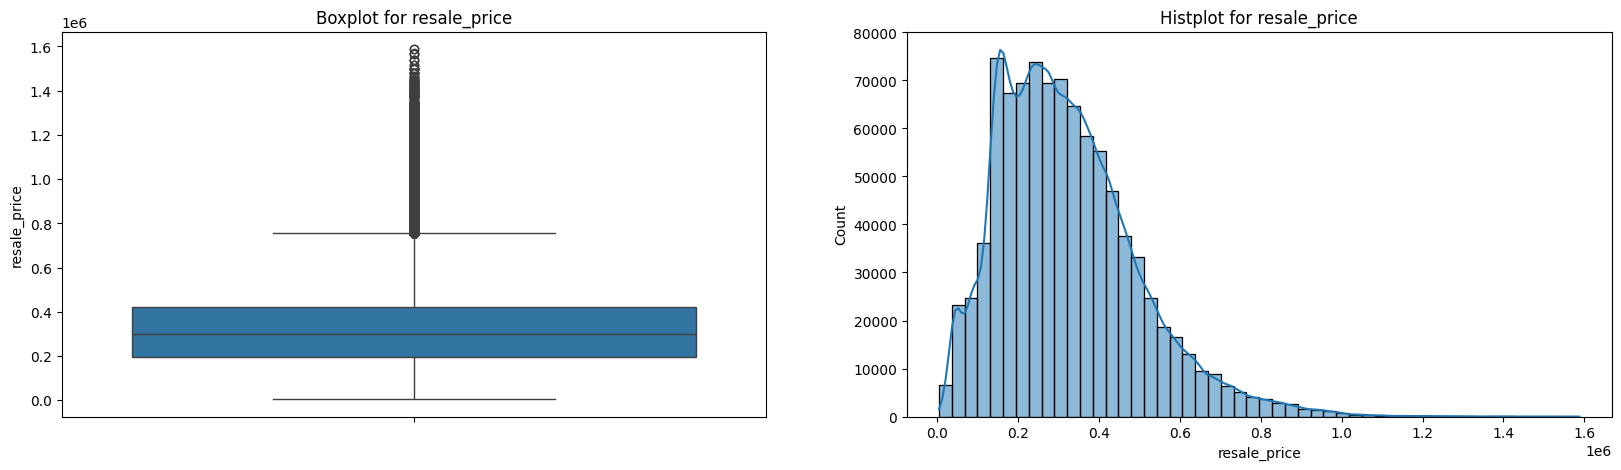

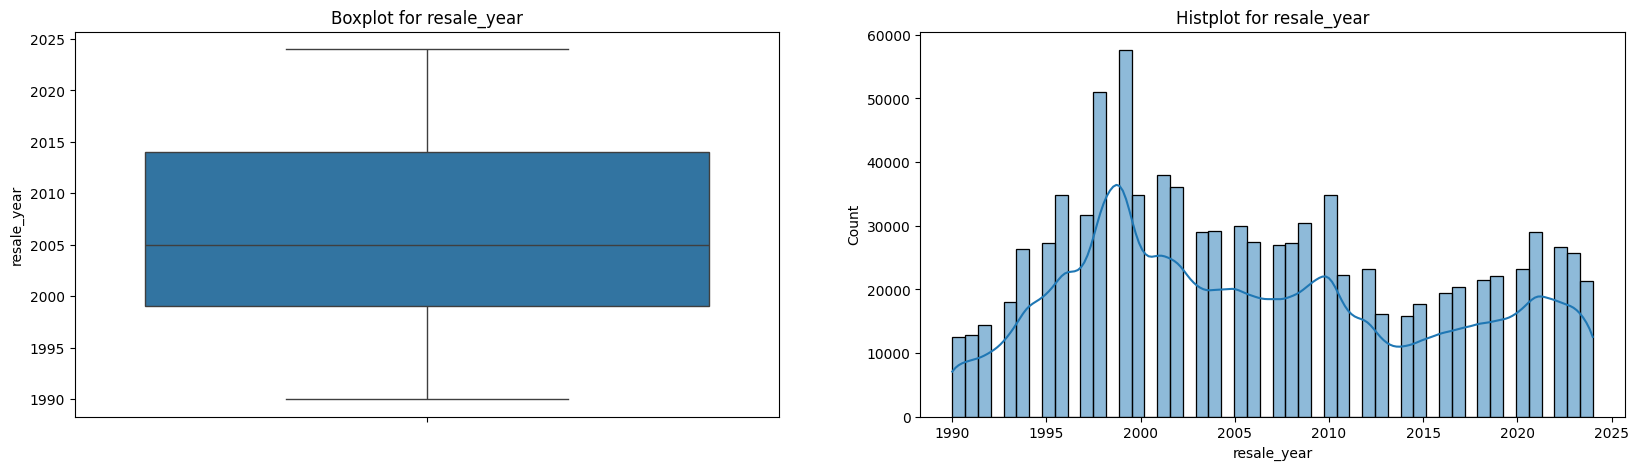

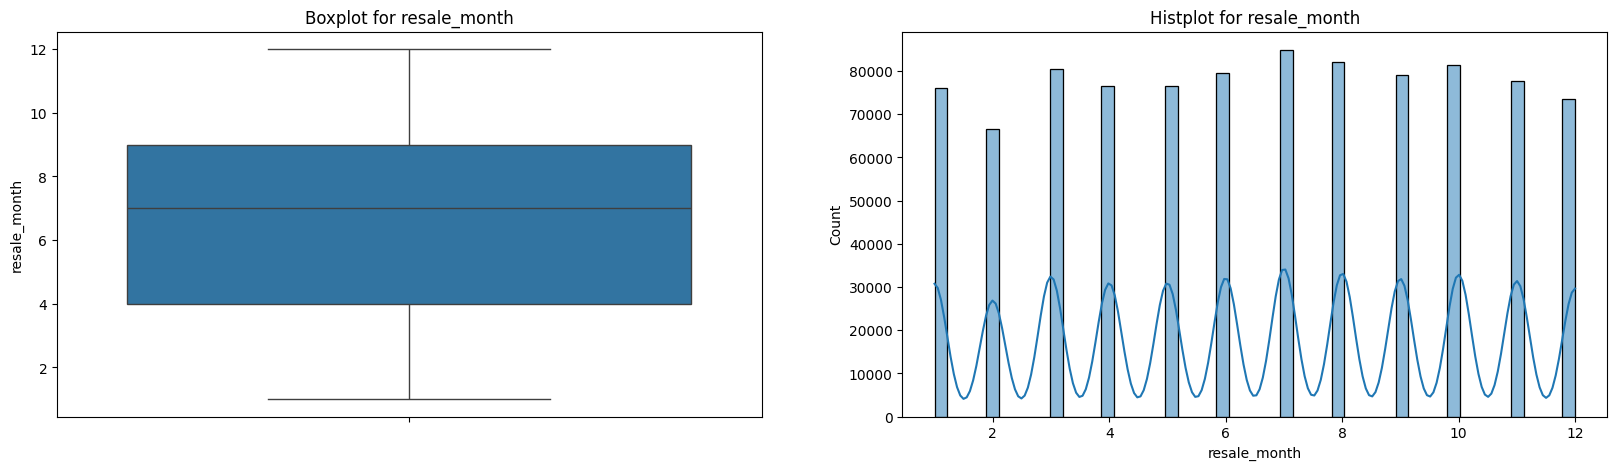

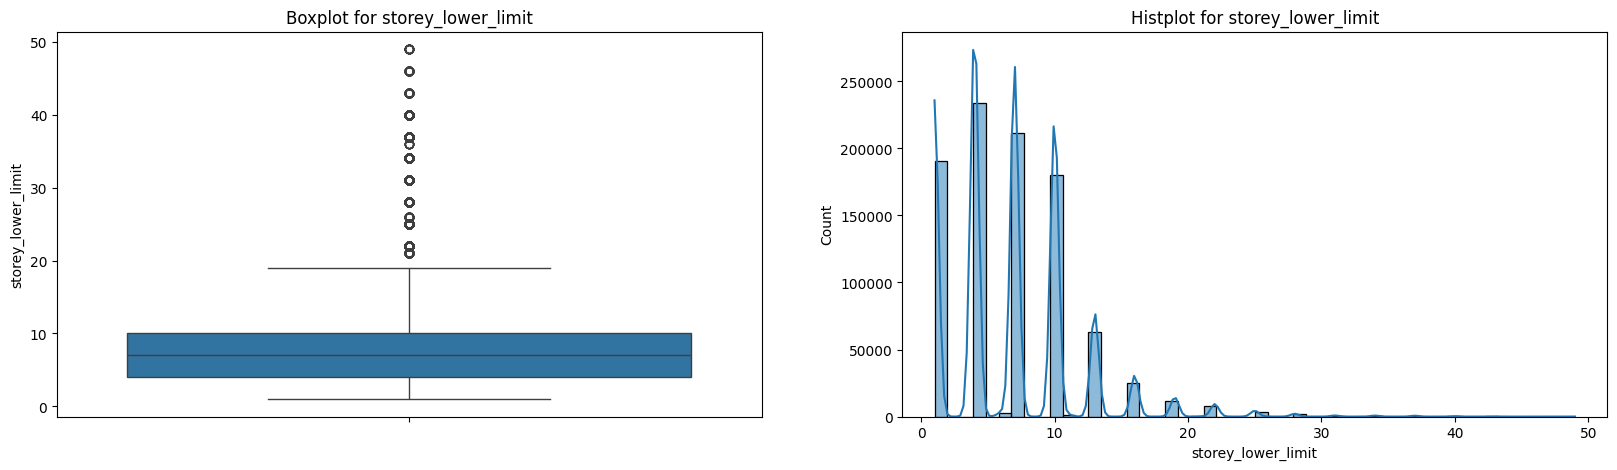

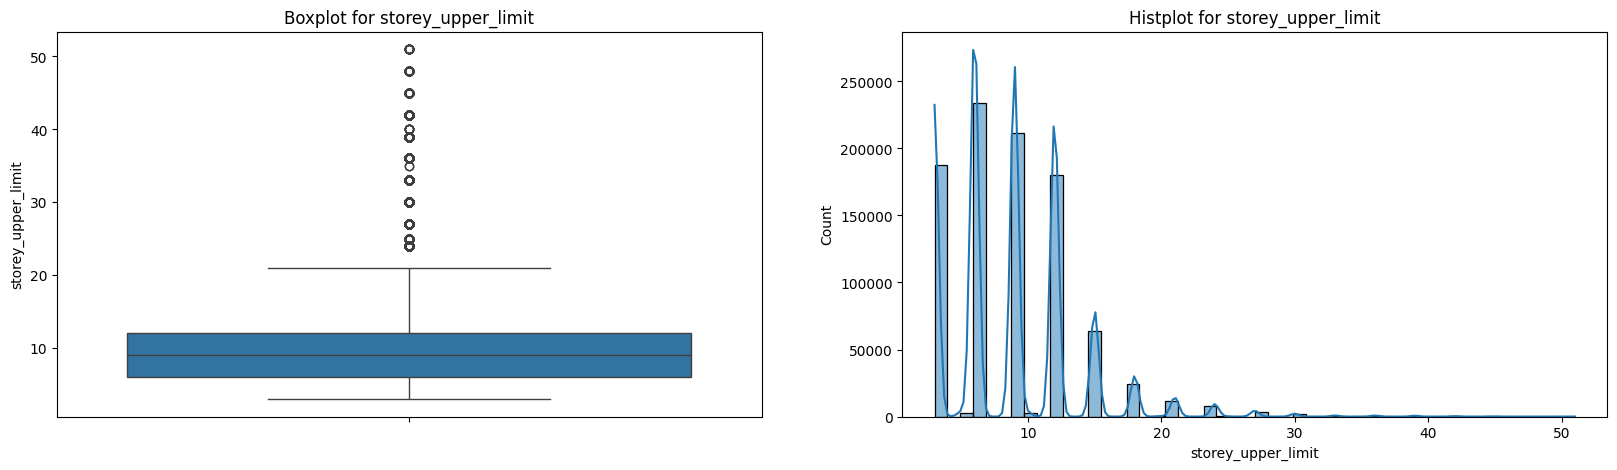

In [27]:
# Checking the skewness and outliers
for i in ["block","floor_area_sqm","lease_commence_date","resale_price","resale_year","resale_month","storey_lower_limit","storey_upper_limit"]:
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(flat_df[i])
    plt.title(f"Boxplot for {i}")
    
    plt.subplot(1,2,2)
    sns.histplot(flat_df[i],kde=True,bins=50)
    plt.title(f"Histplot for {i}")
    plt.show()

In [28]:
# "floor_area_sqm","lease_commence_date","resale_price","storey_lower_limit","storey_upper_limit" has outliers
# Handle these outliers using IQR method and clip the outlier values
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)


outlier(flat_df, 'floor_area_sqm')
outlier(flat_df, 'lease_commence_date')
outlier(flat_df, 'resale_price')
outlier(flat_df, 'storey_lower_limit')
outlier(flat_df, 'storey_upper_limit')

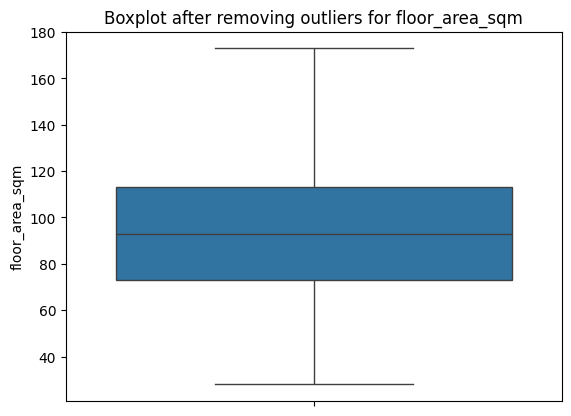

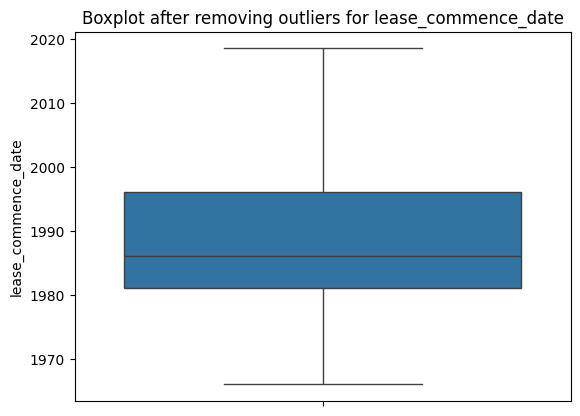

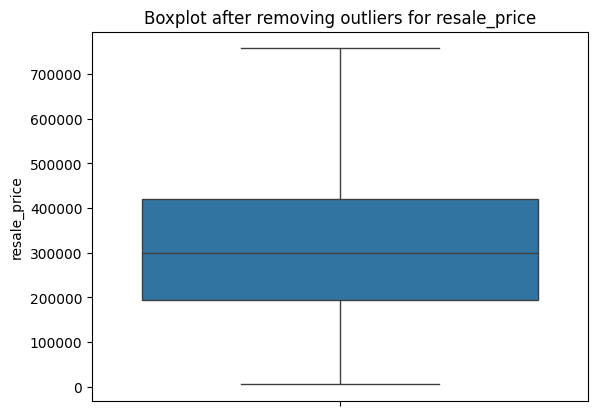

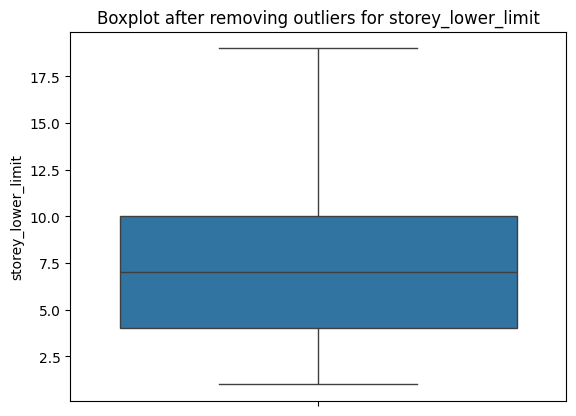

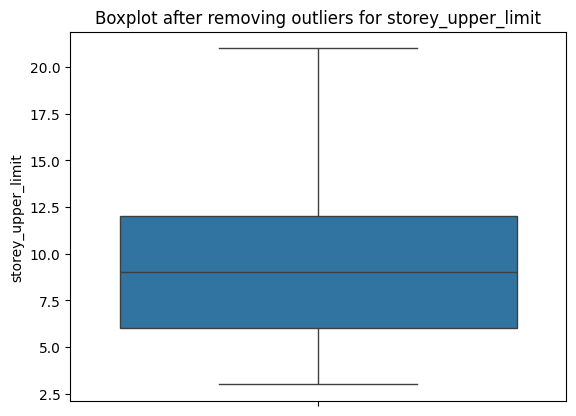

In [29]:
for i in ["floor_area_sqm","lease_commence_date","resale_price","storey_lower_limit","storey_upper_limit"]:
    sns.boxplot(flat_df[i])
    plt.title(f"Boxplot after removing outliers for {i}")
    plt.show()

<Axes: >

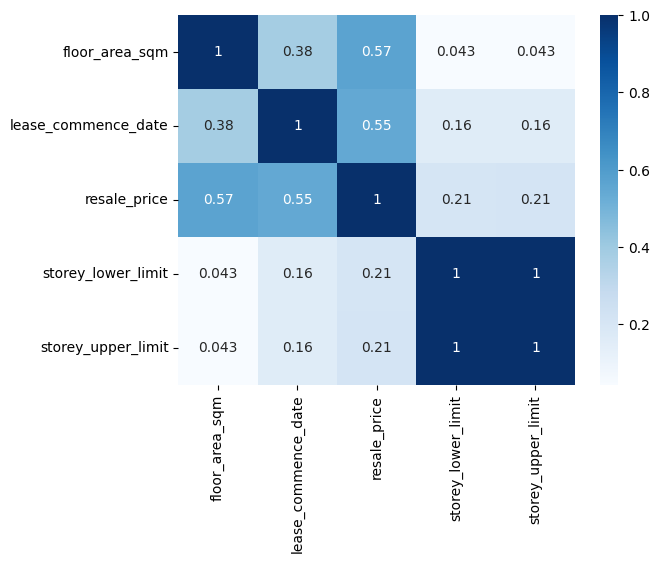

In [30]:
# Checking the correlation between numerical variables
corr= flat_df[["floor_area_sqm","lease_commence_date","resale_price","storey_lower_limit","storey_upper_limit"]].corr()
sns.heatmap(corr,annot=True,cmap = 'Blues')

In [31]:
# storey_lower_limit and storey_upper_limit are highly correlated.So making this is single column
flat_df['storey_average'] = (flat_df['storey_lower_limit'] + flat_df['storey_upper_limit']) / 2

In [32]:
flat_df.drop(columns=['storey_lower_limit','storey_upper_limit'],inplace=True)
flat_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,storey_average
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,9000.0,1990,1,11.0
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,6000.0,1990,1,5.0
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,8000.0,1990,1,11.0
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,6000.0,1990,1,8.0
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,New generation,1976.0,47200.0,1990,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...
936647,YISHUN,5 ROOM,816.0,YISHUN ST 81,122.0,Improved,1988.0,580000.0,2014,12,11.0
936648,YISHUN,EXECUTIVE,325.0,YISHUN CTRL,146.0,Maisonette,1988.0,540000.0,2014,12,11.0
936649,YISHUN,EXECUTIVE,618.0,YISHUN RING RD,164.0,Apartment,1992.0,738000.0,2014,12,8.0
936650,YISHUN,EXECUTIVE,277.0,YISHUN ST 22,152.0,Maisonette,1985.0,592000.0,2014,12,8.0


In [33]:
# Resetting the index
flat_df.reset_index(drop=True, inplace=True)
flat_df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,storey_average
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,9000.0,1990,1,11.0
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,6000.0,1990,1,5.0
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,8000.0,1990,1,11.0
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,6000.0,1990,1,8.0
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,New generation,1976.0,47200.0,1990,1,5.0


In [34]:
flat_df.to_csv("Final_flat_resale_df.csv", index=False)

Regression models - predicting the flat price

In [35]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

In [36]:
# Feature Encoding
final_df = flat_df.copy()
object_data_cols = [i for i in final_df.columns if final_df[i].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [37]:
final_df['town'].value_counts()

town
TAMPINES           80464
YISHUN             70490
JURONG WEST        67108
BEDOK              66947
WOODLANDS          65969
ANG MO KIO         52311
HOUGANG            51164
BUKIT BATOK        44913
CHOA CHU KANG      38665
BUKIT MERAH        34632
PASIR RIS          33368
SENGKANG           33029
TOA PAYOH          31725
QUEENSTOWN         28957
GEYLANG            28361
CLEMENTI           28167
BUKIT PANJANG      27907
KALLANG/WHAMPOA    27469
JURONG EAST        24926
SERANGOON          22954
BISHAN             21375
PUNGGOL            21146
SEMBAWANG          14094
MARINE PARADE       8063
CENTRAL AREA        7201
BUKIT TIMAH         2540
LIM CHU KANG          63
Name: count, dtype: int64

In [38]:
# Using label enoder for town,street_name,flat_model column
label_encoder1 = LabelEncoder()
final_df['encoded_town'] = label_encoder1.fit_transform(final_df['town'])



In [39]:
label_encoder2 = LabelEncoder()
final_df['encoded_street_name'] = label_encoder2.fit_transform(final_df['street_name'])


In [40]:
label_encoder3 = LabelEncoder()
final_df['encoded_flat_model'] = label_encoder3.fit_transform(final_df['flat_model'])

In [41]:
final_df['flat_type'].value_counts()

flat_type
4 ROOM              355389
3 ROOM              297310
5 ROOM              197207
EXECUTIVE            70216
2 ROOM               12067
1 ROOM                1275
MULTI GENERATION       544
Name: count, dtype: int64

In [42]:
# flat_type follows an order. So we can use ordinal encoding
flat_type_encoding = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

final_df['flat_type_encoded'] = final_df['flat_type'].map(flat_type_encoding)
final_df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,resale_year,resale_month,storey_average,encoded_town,encoded_street_name,encoded_flat_model,flat_type_encoded
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,9000.0,1990,1,11.0,0,13,5,1
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,6000.0,1990,1,5.0,0,13,5,1
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,8000.0,1990,1,11.0,0,13,5,1
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,Improved,1977.0,6000.0,1990,1,8.0,0,13,5,1
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,New generation,1976.0,47200.0,1990,1,5.0,0,13,12,3


In [43]:
# drop the previous categorical columns
final_df.drop(columns=['town','flat_type','street_name','flat_model'],inplace=True)
final_df.head()

,block,floor_area_sqm,lease_commence_date,resale_price,resale_year,resale_month,storey_average,encoded_town,encoded_street_name,encoded_flat_model,flat_type_encoded
0,309.0,31.0,1977.0,9000.0,1990,1,11.0,0,13,5,1
1,309.0,31.0,1977.0,6000.0,1990,1,5.0,0,13,5,1
2,309.0,31.0,1977.0,8000.0,1990,1,11.0,0,13,5,1
3,309.0,31.0,1977.0,6000.0,1990,1,8.0,0,13,5,1
4,216.0,73.0,1976.0,47200.0,1990,1,5.0,0,13,12,3


In [44]:
final_df.describe()

,block,floor_area_sqm,lease_commence_date,resale_price,resale_year,resale_month,storey_average,encoded_town,encoded_street_name,encoded_flat_model,flat_type_encoded
count,934008.000000,934008.000000,934008.000000,934008.000000,934008.000000,934008.000000,934008.000000,934008.000000,934008.000000,934008.000000,934008.000000
mean,292.066399,95.681641,1988.361030,321249.588285,2006.345745,6.560078,7.597751,13.657270,287.151547,8.985805,4.014991
std,262.724098,25.714891,10.738258,165096.115568,9.440544,3.399216,4.456088,8.792037,182.144174,3.858876,0.948234
min,1.000000,28.000000,1966.000000,5000.000000,1990.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,55.000000,73.000000,1981.000000,195000.000000,1999.000000,4.000000,5.000000,5.000000,123.000000,5.000000,3.000000
50%,223.000000,93.000000,1986.000000,300000.000000,2005.000000,7.000000,8.000000,13.000000,279.000000,8.000000,4.000000
75%,483.000000,113.000000,1996.000000,420000.000000,2014.000000,9.000000,11.000000,23.000000,462.000000,12.000000,5.000000
max,980.000000,173.000000,2018.500000,757500.000000,2024.000000,12.000000,20.000000,26.000000,585.000000,20.000000,7.000000


In [45]:
final_df.dtypes

block                  float64
floor_area_sqm         float64
lease_commence_date    float64
resale_price           float64
resale_year              int64
resale_month             int64
storey_average         float64
encoded_town             int32
encoded_street_name      int32
encoded_flat_model       int32
flat_type_encoded        int64
dtype: object

In [46]:
X = final_df.drop('resale_price', axis=1) 
y = final_df['resale_price']

In [47]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
X_train.shape

(747206, 10)

In [50]:
# Linear regression
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Evaluate the model
y_pred_train = linear_model.predict(X_train)
y_pred = linear_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr) 
r2_lr = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Mean Absolute Error: {mae_lr:.2f}")
print(f"Mean Squared Error: {mse_lr:.2f}")
print(f"Root Mean Squared Error: {rmse_lr:.2f}")
print("Train_accuracy (R2) :", r2_score(y_train, y_pred_train))
print(f"R-squared: {r2_lr:.2f}")
print(f"Mean Absolute Percentage Error : {mape:.2f}%")

Mean Absolute Error: 58415.61
Mean Squared Error: 5799261131.77
Root Mean Squared Error: 76152.88
Train_accuracy (R2) : 0.7881107612341844
R-squared: 0.79
Mean Absolute Percentage Error : 22.05%


In [52]:
# Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(max_depth=20, random_state=42)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=20, random_state=42)

In [53]:
y_pred_train_dt = dt_regressor.predict(X_train)
y_pred_dt = dt_regressor.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)
mape_dt = np.mean(np.abs((y_test - y_pred_dt) / y_test)) * 100

print("Mean Absolute Error (MAE) :", mae_dt)
print("Mean Squared Error (MSE) :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("Train_accuracy (R2) : ", r2_score(y_train, y_pred_train_dt))
print("R-squared (R2) Score :", r2_dt)
print(f"Mean Absolute Percentage Error : {mape_dt:.2f}%")

Mean Absolute Error (MAE) : 18420.501576158913
Mean Squared Error (MSE) : 779260691.0919985
Root Mean Square Error (RMSE): 27915.241197095154
Train_accuracy (R2) :  0.9858123535781135
R-squared (R2) Score : 0.9714711421748515
Mean Absolute Percentage Error : 6.57%


In [68]:
# Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
y_pred_train_rf = rf_regressor.predict(X_train)
y_pred_rf = rf_regressor.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100

print("Mean Absolute Error (MAE) :", mae_rf)
print("Mean Squared Error (MSE) :", mse_rf)
print("Root Mean Square Error (RMSE):", rmse_rf)
print("Train_accuracy (R2) : ", r2_score(y_train, y_pred_train_rf))
print("R-squared (R2) Score :", r2_rf)
print(f"Mean Absolute Percentage Error : {mape_rf:.2f}%")

Mean Absolute Error (MAE) : 14057.743333012875
Mean Squared Error (MSE) : 421827379.7597779
Root Mean Square Error (RMSE): 20538.43664351739
Train_accuracy (R2) :  0.9976677437432651
R-squared (R2) Score : 0.9845568325446293
Mean Absolute Percentage Error : 5.19%


In [54]:
#  XGBoost regressor
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [55]:
y_pred_train_xgb = xgb_regressor.predict(X_train)
y_pred_xgb = xgb_regressor.predict(X_test)


mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = np.mean(np.abs((y_test - y_pred_xgb) / y_test)) * 100

print("Mean Absolute Error (MAE) :", mae_xgb)
print("Mean Squared Error (MSE)  :", mse_xgb)
print("Root Mean Square Error (RMSE) :", rmse_xgb)
print("Train_accuracy (R2) : ", r2_score(y_train, y_pred_train_xgb))
print("R-squared (R2) Score :", r2_xgb)
print(f"Mean Absolute Percentage Error : {mape_xgb:.2f}%")

Mean Absolute Error (MAE) : 17063.753015135488
Mean Squared Error (MSE)  : 569969165.3113815
Root Mean Square Error (RMSE) : 23874.027002401195
Train_accuracy (R2) :  0.9795692054817622
R-squared (R2) Score : 0.9791333382168931
Mean Absolute Percentage Error : 6.26%


In [112]:
# xgb_regressor has better r2 score without overfitting and comparitively less Mean Absolute Percentage Error compared to other models.

In [56]:
# Save the encoders
with open('town_encoding.pkl', 'wb') as f:
    pickle.dump(label_encoder1, f)

In [57]:
with open('street_name_encoding.pkl', 'wb') as f:
    pickle.dump(label_encoder2, f)

In [58]:
with open('flat_model_encoding.pkl', 'wb') as f:
    pickle.dump(label_encoder3, f)

In [59]:
with open('flat_type_encoding.pkl', 'wb') as f:
    pickle.dump(flat_type_encoding, f)

In [60]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [61]:
# Save the trained model
with open('xgb_regressor_model.pkl', 'wb') as f:
    pickle.dump(xgb_regressor, f)